In [ ]:
import pandas as pdra
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,  confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid,RandomizedSearchCV
from sklearn.ensemble import  VotingRegressor, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression,  Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
import itertools as it
import xgboost as xgb
from catboost import CatBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Libraries for visualizing trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import time as time
from scipy.stats import uniform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# These two lines avoid dead kernel after importing keras
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, InputLayer 

In [377]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [378]:
train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

In [379]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [380]:
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

Variable Selection on Full Dataset

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.drop(columns = 'id')
X = train.drop(columns = 'y')
y = train['y']

Checking multicollinearity

In [9]:
corr_matrix = train.corr()
corr_matrix

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
x001,1.000000,-0.102542,0.153749,0.379679,0.493197,0.247154,-0.165646,-0.103770,-0.032586,-0.108841,...,-0.052222,-0.006532,-0.016382,-0.057818,0.602138,-0.058439,0.629004,-0.149572,-0.005274,0.002661
x002,-0.102542,1.000000,-0.177286,0.035330,-0.180123,0.071401,0.463602,0.961286,0.103345,0.257011,...,0.058053,0.104158,0.045745,0.102208,-0.007468,0.101158,0.017972,0.819495,-0.022161,-0.065831
x003,0.153749,-0.177286,1.000000,-0.066532,-0.052850,-0.113437,-0.500092,-0.197902,-0.179138,-0.323675,...,-0.252394,-0.137534,-0.091690,-0.234049,0.159373,-0.236631,0.204255,-0.500867,-0.005638,0.201294
x004,0.379679,0.035330,-0.066532,1.000000,0.231413,0.222151,0.126973,0.075906,0.038667,0.097453,...,0.082101,0.021076,0.011411,0.044423,0.186038,0.046296,0.225874,0.086455,0.005585,-0.021558
x005,0.493197,-0.180123,-0.052850,0.231413,1.000000,0.166817,-0.061912,-0.115242,0.069205,-0.077010,...,0.050146,0.131325,0.046695,0.040076,-0.007635,0.042812,-0.128443,-0.025749,0.060317,-0.060656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,-0.058439,0.101158,-0.236631,0.046296,0.042812,0.098511,0.366232,0.150967,0.942280,0.300473,...,0.842035,0.227901,0.042165,0.999511,-0.082885,1.000000,-0.101544,0.272372,-0.006575,-0.063036
x763,0.629004,0.017972,0.204255,0.225874,-0.128443,0.226026,-0.154933,-0.019153,-0.085807,-0.086384,...,-0.100417,-0.086515,-0.037527,-0.099358,0.794701,-0.101544,1.000000,-0.141807,-0.032923,0.009145
x764,-0.149572,0.819495,-0.500867,0.086455,-0.025749,0.116250,0.741603,0.853014,0.244453,0.478806,...,0.250796,0.210006,0.094214,0.269973,-0.133994,0.272372,-0.141807,1.000000,-0.016775,-0.128958
x765,-0.005274,-0.022161,-0.005638,0.005585,0.060317,-0.014770,-0.011229,-0.012326,-0.003104,-0.015868,...,-0.002085,-0.001432,-0.032845,-0.006884,-0.017833,-0.006575,-0.032923,-0.016775,1.000000,0.067693


In [151]:
# Sort the correlations into a series

corr_series = corr_matrix.unstack()
corr_series = corr_series[corr_series.index.get_level_values(0) != corr_series.index.get_level_values(1)]

sorted_corr = corr_series.sort_values(ascending=False)

# Pull perfect correlations

corr_1 = sorted_corr[sorted_corr == 1.0]

# Absolute value correlations
# Pull perfect correlations and those above 0.8

corr_series_abs = corr_series.abs()
sorted_corr_abs = corr_series_abs.sort_values(ascending=False)
corr_1_abs = sorted_corr_abs[sorted_corr_abs == 1.0]
corr_08_abs = sorted_corr_abs[(sorted_corr_abs > 0.8)]

In [144]:
# Create an empty set to store the features to be removed
features_to_remove = set()

# Iterate over the series and identify features to be removed
for pair, correlation in corr_08_abs.items():
    feature1, feature2 = pair
    features_to_remove.add(feature2)
    
# Assuming your dataset X_train is a pandas DataFrame
# Remove the unwanted features from the X_train DataFrame
X_train = X_train.drop(columns=features_to_remove)

In [381]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

len(to_drop)

<ipython-input-381-c52ce255f6c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


532

In [382]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)
train

,x001,x002,x003,x004,x005,x006,x007,x009,x013,x014,...,x707,x712,x719,x727,x729,x734,x737,x741,x750,y
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,14539.0,56.695,4.82,...,586885589994299981824,10.0295,1336.88,0.00,4.27,2.0,1.35495,0.752647,0.50,5
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1051272.0,95.000,4.00,...,5550000000000000000,NaN,13877.56,0.09,4.27,8.0,-0.87106,0.959400,0.50,1
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,144143.0,92.600,6.62,...,88897890482495995904,8.5580,5267.48,0.00,3.68,7.0,1.39396,0.908315,0.36,11
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,10055.0,92.130,5.60,...,28732631875074998272,2.7726,359.02,0.00,4.23,6.0,1.34729,0.941133,0.50,1
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,17914.0,94.550,2.43,...,44666736442821001216,5.6557,1291.61,0.90,4.15,16.0,1.46264,0.907586,0.45,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,4439.0,80.000,10.88,...,3970000000000000000,0.0000,0.00,0.00,4.52,7.0,1.15515,0.862925,0.43,4
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,19106.0,97.760,5.40,...,302089053432449990656,4.6825,819.77,0.00,4.61,4.0,1.31724,0.918410,0.46,8
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,71514.0,94.940,4.58,...,113673829679690006528,0.0000,1374.77,0.00,3.87,8.0,1.31993,0.900614,0.45,21
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,13977.0,101.510,5.68,...,59483907779766001664,4.6474,891.79,0.00,4.01,2.0,1.30878,0.887655,0.39,13


Imputing data (and updating X and y data)

In [383]:
X = train.drop(columns = 'y')
y = train['y']

sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [384]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

Performing PCA

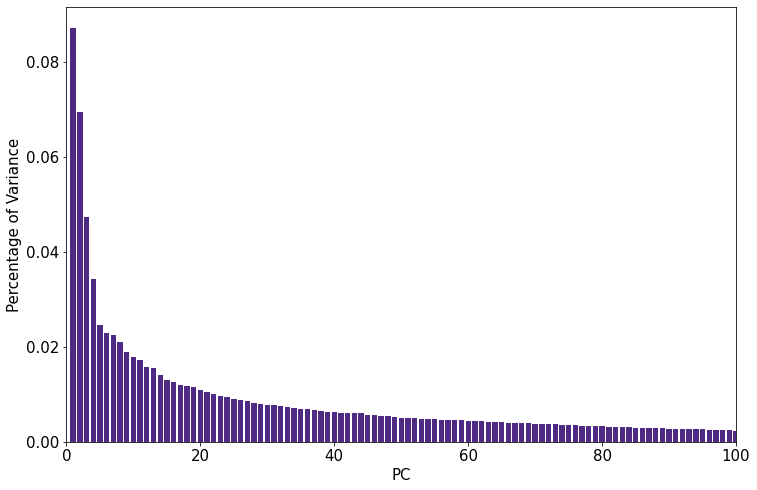

In [385]:
pca = PCA()
pca.fit(X_train)

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color = "#4E2A84")
plt.xlabel('PC')
plt.ylabel('Percentage of Variance')
plt.xlim(0,100)
plt.show()

In [386]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X_train)
print(pca.n_components_)

129


In [387]:
# transform the pandas dataframe into an array
X_train_transformed = pca.transform(X_train)

# transform the array back into a pandas dataframe
X_train_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_train_transformed)[:, :pca.n_components_],
                                           columns=X_train.columns[:pca.n_components_])

X_train = X_train_inverse_transformed
X_test = X_test.loc[:, X_train.columns]

In [388]:
print(X_train.shape)
print(X_test.shape)

(3766, 129)
(1614, 129)


Neural Network

In [30]:
y_train.shape

(3766,)

In [160]:
network = Sequential() # empty network created
network.add(InputLayer(input_shape = (129,))) # Input layer added
network.add(Dense(64, activation = 'relu')) # First hidden layer added
network.add(Dense(32, activation = 'relu')) # Second hidden layer added
network.add(Dense(16, activation = 'relu')) # Three hidden layer added
network.add(Dense(1, activation = 'sigmoid')) # Output layer added

In [161]:
# Compile the model
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

network.fit(X_train, y_train)
network.summary()

118/118 [==============================] - 0s 764us/step - loss: -358.3226 - accuracy: 0.1097
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = network.fit(X_train, y_train, epochs=10, batch_size = 32, validation_data=(X_test, y_test))

Epoch 1/10
118/118 [==============================] - 0s 2ms/step - loss: -16953.0527 - accuracy: 0.1142 - val_loss: -46988.0391 - val_accuracy: 0.1301
Epoch 2/10
118/118 [==============================] - 0s 944us/step - loss: -150302.8750 - accuracy: 0.1142 - val_loss: -300028.9375 - val_accuracy: 0.1301
Epoch 3/10
118/118 [==============================] - 0s 1ms/step - loss: -660762.6875 - accuracy: 0.1142 - val_loss: -1087891.0000 - val_accuracy: 0.1301
Epoch 4/10
118/118 [==============================] - 0s 1ms/step - loss: -2071995.3750 - accuracy: 0.1142 - val_loss: -3000562.2500 - val_accuracy: 0.1301
Epoch 5/10
118/118 [==============================] - 0s 2ms/step - loss: -4908247.0000 - accuracy: 0.1142 - val_loss: -6489178.0000 - val_accuracy: 0.1301
Epoch 6/10
118/118 [==============================] - 0s 1ms/step - loss: -9663647.0000 - accuracy: 0.1142 - val_loss: -12029225.0000 - val_accuracy: 0.1301
Epoch 7/10
118/118 [==============================] - 0s 972us/step 

In [163]:
y_pred = network.predict(X_train)

In [164]:
print(y_pred.shape)
print(y_train.shape)

(3766, 1)
(3766,)


Lasso

In [95]:
#Let us use cross validation to find the optimal value of the tuning parameter lambda
#For the optimal lambda, the cross validation error will be the least
#Note that we are reducing the range of alpha so as to better visualize the minimum

alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 1000000)
lassocv.fit(X_train, y_train)
#Optimal value of the tuning parameter - lamda
lassocv.alpha_


C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.4099826788879, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382.68784861953463, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624.7904051683145, tolerance: 51.54151401593389
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

KeyboardInterrupt: 

In [ ]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y)
pred=lasso.predict(Xtest_std)

CatBoost

In [390]:
uniform(loc=0.01, scale=0.1)

In [391]:
# Define the parameter grid for random search
param_grid = {
    'iterations': [200, 300],               # Number of boosting iterations
    'depth': [4, 8],                           # Depth of each tree
    'learning_rate': [.01, .1] # Learning rate
}

# Define the CatBoost model
cat = CatBoostRegressor(loss_function='RMSE', random_seed=42)

# Perform random search cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, n_iter=5, scoring='neg_root_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)


C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


0:	learn: 3.9729821	total: 597ms	remaining: 1m 58s
1:	learn: 3.7749861	total: 1.2s	remaining: 1m 58s
2:	learn: 3.6387858	total: 1.79s	remaining: 1m 57s
3:	learn: 3.5141031	total: 2.42s	remaining: 1m 58s
4:	learn: 3.4204069	total: 3.09s	remaining: 2m
5:	learn: 3.3357722	total: 3.79s	remaining: 2m 2s
6:	learn: 3.2704325	total: 4.5s	remaining: 2m 3s
7:	learn: 3.2136549	total: 5.19s	remaining: 2m 4s
8:	learn: 3.1603073	total: 5.88s	remaining: 2m 4s
9:	learn: 3.1140361	total: 6.62s	remaining: 2m 5s
10:	learn: 3.0700190	total: 7.29s	remaining: 2m 5s
11:	learn: 3.0344900	total: 8.07s	remaining: 2m 6s
12:	learn: 3.0024671	total: 8.76s	remaining: 2m 5s
13:	learn: 2.9713176	total: 9.43s	remaining: 2m 5s
14:	learn: 2.9409999	total: 10.1s	remaining: 2m 4s
15:	learn: 2.9143326	total: 10.8s	remaining: 2m 4s
16:	learn: 2.8919884	total: 11.5s	remaining: 2m 3s
17:	learn: 2.8695736	total: 12.1s	remaining: 2m 2s
18:	learn: 2.8472625	total: 12.8s	remaining: 2m 1s
19:	learn: 2.8293305	total: 13.5s	remainin

159:	learn: 1.9639801	total: 1m 47s	remaining: 27s
160:	learn: 1.9588619	total: 1m 48s	remaining: 26.3s
161:	learn: 1.9558010	total: 1m 49s	remaining: 25.6s
162:	learn: 1.9526288	total: 1m 49s	remaining: 24.9s
163:	learn: 1.9481531	total: 1m 50s	remaining: 24.2s
164:	learn: 1.9459916	total: 1m 51s	remaining: 23.6s
165:	learn: 1.9412279	total: 1m 51s	remaining: 22.9s
166:	learn: 1.9370374	total: 1m 52s	remaining: 22.2s
167:	learn: 1.9343480	total: 1m 53s	remaining: 21.5s
168:	learn: 1.9305566	total: 1m 53s	remaining: 20.8s
169:	learn: 1.9276346	total: 1m 54s	remaining: 20.2s
170:	learn: 1.9235304	total: 1m 54s	remaining: 19.5s
171:	learn: 1.9209561	total: 1m 55s	remaining: 18.8s
172:	learn: 1.9165613	total: 1m 56s	remaining: 18.1s
173:	learn: 1.9126154	total: 1m 56s	remaining: 17.5s
174:	learn: 1.9074104	total: 1m 57s	remaining: 16.8s
175:	learn: 1.9036513	total: 1m 58s	remaining: 16.1s
176:	learn: 1.9008275	total: 1m 58s	remaining: 15.4s
177:	learn: 1.8954211	total: 1m 59s	remaining: 1

118:	learn: 2.1329403	total: 1m 13s	remaining: 50.1s
119:	learn: 2.1288516	total: 1m 14s	remaining: 49.5s
120:	learn: 2.1241077	total: 1m 14s	remaining: 48.9s
121:	learn: 2.1190608	total: 1m 15s	remaining: 48.4s
122:	learn: 2.1130198	total: 1m 16s	remaining: 47.8s
123:	learn: 2.1069848	total: 1m 17s	remaining: 47.2s
124:	learn: 2.1021747	total: 1m 17s	remaining: 46.8s
125:	learn: 2.0966418	total: 1m 18s	remaining: 46.2s
126:	learn: 2.0921922	total: 1m 19s	remaining: 45.6s
127:	learn: 2.0880975	total: 1m 20s	remaining: 45.2s
128:	learn: 2.0845850	total: 1m 21s	remaining: 44.7s
129:	learn: 2.0814197	total: 1m 21s	remaining: 44.1s
130:	learn: 2.0791427	total: 1m 22s	remaining: 43.6s
131:	learn: 2.0738392	total: 1m 23s	remaining: 43s
132:	learn: 2.0692338	total: 1m 24s	remaining: 42.5s
133:	learn: 2.0652743	total: 1m 25s	remaining: 42.1s
134:	learn: 2.0611301	total: 1m 26s	remaining: 41.5s
135:	learn: 2.0576101	total: 1m 27s	remaining: 41s
136:	learn: 2.0542931	total: 1m 28s	remaining: 40.

76:	learn: 2.3319113	total: 51.5s	remaining: 1m 22s
77:	learn: 2.3264865	total: 51.9s	remaining: 1m 21s
78:	learn: 2.3191353	total: 52.3s	remaining: 1m 20s
79:	learn: 2.3140291	total: 52.9s	remaining: 1m 19s
80:	learn: 2.3086062	total: 53.6s	remaining: 1m 18s
81:	learn: 2.3037841	total: 54.1s	remaining: 1m 17s
82:	learn: 2.2981913	total: 54.9s	remaining: 1m 17s
83:	learn: 2.2910376	total: 55.5s	remaining: 1m 16s
84:	learn: 2.2858761	total: 56.2s	remaining: 1m 16s
85:	learn: 2.2777388	total: 56.9s	remaining: 1m 15s
86:	learn: 2.2717081	total: 57.5s	remaining: 1m 14s
87:	learn: 2.2665675	total: 58.1s	remaining: 1m 13s
88:	learn: 2.2626933	total: 58.7s	remaining: 1m 13s
89:	learn: 2.2594603	total: 59.3s	remaining: 1m 12s
90:	learn: 2.2562187	total: 59.9s	remaining: 1m 11s
91:	learn: 2.2526145	total: 1m	remaining: 1m 11s
92:	learn: 2.2485602	total: 1m 1s	remaining: 1m 10s
93:	learn: 2.2445023	total: 1m 1s	remaining: 1m 9s
94:	learn: 2.2407838	total: 1m 2s	remaining: 1m 8s
95:	learn: 2.2383

33:	learn: 2.4353730	total: 4m 58s	remaining: 24m 15s
34:	learn: 2.4083358	total: 5m 8s	remaining: 24m 13s
35:	learn: 2.3818849	total: 5m 18s	remaining: 24m 8s
36:	learn: 2.3550420	total: 5m 28s	remaining: 24m 5s
37:	learn: 2.3294170	total: 5m 37s	remaining: 24m
38:	learn: 2.3052678	total: 5m 47s	remaining: 23m 53s
39:	learn: 2.2803820	total: 5m 56s	remaining: 23m 44s
40:	learn: 2.2538682	total: 6m 5s	remaining: 23m 37s
41:	learn: 2.2319859	total: 6m 5s	remaining: 23m 37s
42:	learn: 2.2087886	total: 6m 9s	remaining: 23m 2s
43:	learn: 2.1855907	total: 6m 13s	remaining: 22m 36s
44:	learn: 2.1635390	total: 6m 17s	remaining: 22m 10s
45:	learn: 2.1419532	total: 6m 21s	remaining: 21m 44s
46:	learn: 2.1193304	total: 6m 24s	remaining: 21m 20s
47:	learn: 2.0993639	total: 6m 28s	remaining: 20m 55s
48:	learn: 2.0797936	total: 6m 31s	remaining: 20m 33s
49:	learn: 2.0593147	total: 6m 35s	remaining: 20m 10s
50:	learn: 2.0391808	total: 6m 39s	remaining: 19m 49s
51:	learn: 2.0200912	total: 6m 51s	rema

184:	learn: 0.6983036	total: 21m 38s	remaining: 1m 45s
185:	learn: 0.6932675	total: 21m 45s	remaining: 1m 38s
186:	learn: 0.6893754	total: 21m 51s	remaining: 1m 31s
187:	learn: 0.6847286	total: 21m 57s	remaining: 1m 24s
188:	learn: 0.6806054	total: 22m 3s	remaining: 1m 17s
189:	learn: 0.6761352	total: 22m 9s	remaining: 1m 10s
190:	learn: 0.6711131	total: 22m 16s	remaining: 1m 3s
191:	learn: 0.6670234	total: 22m 22s	remaining: 56.2s
192:	learn: 0.6633911	total: 22m 28s	remaining: 49.2s
193:	learn: 0.6585690	total: 22m 36s	remaining: 42.2s
194:	learn: 0.6551900	total: 22m 43s	remaining: 35.1s
195:	learn: 0.6498737	total: 22m 50s	remaining: 28.1s
196:	learn: 0.6450531	total: 22m 57s	remaining: 21.1s
197:	learn: 0.6407106	total: 23m 3s	remaining: 14.1s
198:	learn: 0.6362663	total: 23m 10s	remaining: 7.02s
199:	learn: 0.6332371	total: 23m 17s	remaining: 0us
0:	learn: 4.1019522	total: 6.83s	remaining: 22m 39s
1:	learn: 4.0132500	total: 14.5s	remaining: 23m 59s
2:	learn: 3.9469330	total: 21.1

137:	learn: 0.9683588	total: 12m 51s	remaining: 5m 46s
138:	learn: 0.9617126	total: 12m 56s	remaining: 5m 40s
139:	learn: 0.9540570	total: 13m 1s	remaining: 5m 35s
140:	learn: 0.9468148	total: 13m 6s	remaining: 5m 29s
141:	learn: 0.9381860	total: 13m 11s	remaining: 5m 23s
142:	learn: 0.9303374	total: 13m 15s	remaining: 5m 17s
143:	learn: 0.9224629	total: 13m 20s	remaining: 5m 11s
144:	learn: 0.9151872	total: 13m 24s	remaining: 5m 5s
145:	learn: 0.9074873	total: 13m 28s	remaining: 4m 58s
146:	learn: 0.8991031	total: 13m 32s	remaining: 4m 53s
147:	learn: 0.8923592	total: 13m 36s	remaining: 4m 47s
148:	learn: 0.8864107	total: 13m 40s	remaining: 4m 40s
149:	learn: 0.8794291	total: 13m 44s	remaining: 4m 34s
150:	learn: 0.8731023	total: 13m 49s	remaining: 4m 29s
151:	learn: 0.8678602	total: 13m 53s	remaining: 4m 23s
152:	learn: 0.8620193	total: 13m 57s	remaining: 4m 17s
153:	learn: 0.8552566	total: 14m 2s	remaining: 4m 11s
154:	learn: 0.8487482	total: 14m 7s	remaining: 4m 6s
155:	learn: 0.84

90:	learn: 1.3992194	total: 8m 4s	remaining: 9m 40s
91:	learn: 1.3869770	total: 8m 9s	remaining: 9m 34s
92:	learn: 1.3749020	total: 8m 15s	remaining: 9m 30s
93:	learn: 1.3614679	total: 8m 21s	remaining: 9m 25s
94:	learn: 1.3514283	total: 8m 26s	remaining: 9m 20s
95:	learn: 1.3393845	total: 8m 32s	remaining: 9m 14s
96:	learn: 1.3266011	total: 8m 37s	remaining: 9m 9s
97:	learn: 1.3180552	total: 8m 42s	remaining: 9m 3s
98:	learn: 1.3061814	total: 8m 47s	remaining: 8m 58s
99:	learn: 1.2951917	total: 8m 52s	remaining: 8m 52s
100:	learn: 1.2842172	total: 8m 58s	remaining: 8m 47s
101:	learn: 1.2727331	total: 9m 3s	remaining: 8m 42s
102:	learn: 1.2608934	total: 9m 8s	remaining: 8m 36s
103:	learn: 1.2510963	total: 9m 13s	remaining: 8m 31s
104:	learn: 1.2413471	total: 9m 19s	remaining: 8m 25s
105:	learn: 1.2319000	total: 9m 24s	remaining: 8m 20s
106:	learn: 1.2201794	total: 9m 29s	remaining: 8m 15s
107:	learn: 1.2096755	total: 9m 35s	remaining: 8m 10s
108:	learn: 1.1987980	total: 9m 41s	remainin

44:	learn: 3.4947819	total: 21.3s	remaining: 1m 13s
45:	learn: 3.4857201	total: 21.9s	remaining: 1m 13s
46:	learn: 3.4752940	total: 22.4s	remaining: 1m 12s
47:	learn: 3.4655250	total: 23s	remaining: 1m 12s
48:	learn: 3.4571285	total: 23.5s	remaining: 1m 12s
49:	learn: 3.4483764	total: 24s	remaining: 1m 12s
50:	learn: 3.4394698	total: 24.6s	remaining: 1m 12s
51:	learn: 3.4313327	total: 25.2s	remaining: 1m 11s
52:	learn: 3.4217163	total: 25.7s	remaining: 1m 11s
53:	learn: 3.4127148	total: 26.2s	remaining: 1m 10s
54:	learn: 3.4040185	total: 26.7s	remaining: 1m 10s
55:	learn: 3.3954350	total: 27.2s	remaining: 1m 9s
56:	learn: 3.3870824	total: 27.6s	remaining: 1m 9s
57:	learn: 3.3794595	total: 28.1s	remaining: 1m 8s
58:	learn: 3.3721516	total: 28.5s	remaining: 1m 8s
59:	learn: 3.3651977	total: 29s	remaining: 1m 7s
60:	learn: 3.3583226	total: 29.5s	remaining: 1m 7s
61:	learn: 3.3517687	total: 30s	remaining: 1m 6s
62:	learn: 3.3437806	total: 30.5s	remaining: 1m 6s
63:	learn: 3.3366941	total: 

3:	learn: 4.1031525	total: 1.78s	remaining: 1m 27s
4:	learn: 4.0808196	total: 2.26s	remaining: 1m 28s
5:	learn: 4.0579623	total: 2.72s	remaining: 1m 27s
6:	learn: 4.0382289	total: 3.3s	remaining: 1m 31s
7:	learn: 4.0168611	total: 3.85s	remaining: 1m 32s
8:	learn: 3.9984477	total: 4.4s	remaining: 1m 33s
9:	learn: 3.9800477	total: 4.94s	remaining: 1m 33s
10:	learn: 3.9585066	total: 5.46s	remaining: 1m 33s
11:	learn: 3.9377061	total: 6.09s	remaining: 1m 35s
12:	learn: 3.9193760	total: 6.52s	remaining: 1m 33s
13:	learn: 3.9019084	total: 7.03s	remaining: 1m 33s
14:	learn: 3.8852974	total: 7.44s	remaining: 1m 31s
15:	learn: 3.8695353	total: 7.88s	remaining: 1m 30s
16:	learn: 3.8533459	total: 8.35s	remaining: 1m 29s
17:	learn: 3.8356019	total: 8.8s	remaining: 1m 28s
18:	learn: 3.8184807	total: 9.34s	remaining: 1m 28s
19:	learn: 3.8007269	total: 9.94s	remaining: 1m 29s
20:	learn: 3.7843694	total: 10.6s	remaining: 1m 30s
21:	learn: 3.7705619	total: 11.2s	remaining: 1m 30s
22:	learn: 3.7549051	t

162:	learn: 2.9310657	total: 1m 26s	remaining: 19.7s
163:	learn: 2.9282124	total: 1m 27s	remaining: 19.2s
164:	learn: 2.9256745	total: 1m 27s	remaining: 18.7s
165:	learn: 2.9233987	total: 1m 28s	remaining: 18.1s
166:	learn: 2.9210113	total: 1m 28s	remaining: 17.6s
167:	learn: 2.9187959	total: 1m 29s	remaining: 17s
168:	learn: 2.9159781	total: 1m 29s	remaining: 16.5s
169:	learn: 2.9138337	total: 1m 30s	remaining: 15.9s
170:	learn: 2.9116338	total: 1m 30s	remaining: 15.4s
171:	learn: 2.9095857	total: 1m 31s	remaining: 14.9s
172:	learn: 2.9074660	total: 1m 31s	remaining: 14.3s
173:	learn: 2.9053253	total: 1m 32s	remaining: 13.8s
174:	learn: 2.9031640	total: 1m 32s	remaining: 13.2s
175:	learn: 2.9008847	total: 1m 33s	remaining: 12.7s
176:	learn: 2.8984241	total: 1m 33s	remaining: 12.2s
177:	learn: 2.8963651	total: 1m 34s	remaining: 11.6s
178:	learn: 2.8940659	total: 1m 34s	remaining: 11.1s
179:	learn: 2.8920012	total: 1m 35s	remaining: 10.6s
180:	learn: 2.8898494	total: 1m 35s	remaining: 1

121:	learn: 3.0493743	total: 54.4s	remaining: 34.8s
122:	learn: 3.0453469	total: 54.8s	remaining: 34.3s
123:	learn: 3.0418205	total: 55.2s	remaining: 33.8s
124:	learn: 3.0384507	total: 55.7s	remaining: 33.4s
125:	learn: 3.0348424	total: 56.1s	remaining: 32.9s
126:	learn: 3.0317232	total: 56.5s	remaining: 32.5s
127:	learn: 3.0284457	total: 56.9s	remaining: 32s
128:	learn: 3.0254043	total: 57.3s	remaining: 31.5s
129:	learn: 3.0218092	total: 57.7s	remaining: 31.1s
130:	learn: 3.0183456	total: 58.2s	remaining: 30.7s
131:	learn: 3.0153089	total: 58.7s	remaining: 30.2s
132:	learn: 3.0116797	total: 59.2s	remaining: 29.8s
133:	learn: 3.0083751	total: 59.6s	remaining: 29.4s
134:	learn: 3.0053921	total: 1m	remaining: 28.9s
135:	learn: 3.0018400	total: 1m	remaining: 28.4s
136:	learn: 2.9989011	total: 1m	remaining: 28s
137:	learn: 2.9959756	total: 1m 1s	remaining: 27.5s
138:	learn: 2.9929763	total: 1m 1s	remaining: 27.1s
139:	learn: 2.9903956	total: 1m 2s	remaining: 26.6s
140:	learn: 2.9875345	tot

77:	learn: 1.5807197	total: 8m 19s	remaining: 23m 42s
78:	learn: 1.5671121	total: 8m 25s	remaining: 23m 34s
79:	learn: 1.5521499	total: 8m 31s	remaining: 23m 25s
80:	learn: 1.5387088	total: 8m 36s	remaining: 23m 16s
81:	learn: 1.5260470	total: 8m 41s	remaining: 23m 7s
82:	learn: 1.5132710	total: 8m 47s	remaining: 22m 59s
83:	learn: 1.4993483	total: 8m 53s	remaining: 22m 50s
84:	learn: 1.4861910	total: 8m 58s	remaining: 22m 42s
85:	learn: 1.4739781	total: 9m 3s	remaining: 22m 33s
86:	learn: 1.4621213	total: 9m 9s	remaining: 22m 24s
87:	learn: 1.4479616	total: 9m 14s	remaining: 22m 16s
88:	learn: 1.4347873	total: 9m 19s	remaining: 22m 7s
89:	learn: 1.4196473	total: 9m 25s	remaining: 21m 58s
90:	learn: 1.4078362	total: 9m 30s	remaining: 21m 50s
91:	learn: 1.3963371	total: 9m 35s	remaining: 21m 41s
92:	learn: 1.3846355	total: 9m 41s	remaining: 21m 33s
93:	learn: 1.3738649	total: 9m 46s	remaining: 21m 26s
94:	learn: 1.3602161	total: 9m 52s	remaining: 21m 17s
95:	learn: 1.3470605	total: 9m 5

226:	learn: 0.5357922	total: 22m 9s	remaining: 7m 7s
227:	learn: 0.5322554	total: 22m 16s	remaining: 7m 1s
228:	learn: 0.5282960	total: 22m 21s	remaining: 6m 55s
229:	learn: 0.5256866	total: 22m 26s	remaining: 6m 49s
230:	learn: 0.5221440	total: 22m 31s	remaining: 6m 43s
231:	learn: 0.5186590	total: 22m 36s	remaining: 6m 37s
232:	learn: 0.5152203	total: 22m 41s	remaining: 6m 31s
233:	learn: 0.5113083	total: 22m 47s	remaining: 6m 25s
234:	learn: 0.5093155	total: 22m 52s	remaining: 6m 19s
235:	learn: 0.5053037	total: 22m 57s	remaining: 6m 13s
236:	learn: 0.5021808	total: 23m 2s	remaining: 6m 7s
237:	learn: 0.4993477	total: 23m 7s	remaining: 6m 1s
238:	learn: 0.4966131	total: 23m 12s	remaining: 5m 55s
239:	learn: 0.4939217	total: 23m 17s	remaining: 5m 49s
240:	learn: 0.4905730	total: 23m 23s	remaining: 5m 43s
241:	learn: 0.4883949	total: 23m 28s	remaining: 5m 37s
242:	learn: 0.4845828	total: 23m 33s	remaining: 5m 31s
243:	learn: 0.4817764	total: 23m 38s	remaining: 5m 25s
244:	learn: 0.480

78:	learn: 1.5759808	total: 7m 20s	remaining: 20m 33s
79:	learn: 1.5619412	total: 7m 26s	remaining: 20m 27s
80:	learn: 1.5479455	total: 7m 31s	remaining: 20m 21s
81:	learn: 1.5343429	total: 7m 37s	remaining: 20m 15s
82:	learn: 1.5209670	total: 7m 42s	remaining: 20m 9s
83:	learn: 1.5068971	total: 7m 48s	remaining: 20m 4s
84:	learn: 1.4958422	total: 7m 53s	remaining: 19m 58s
85:	learn: 1.4816483	total: 7m 59s	remaining: 19m 52s
86:	learn: 1.4671207	total: 8m 4s	remaining: 19m 46s
87:	learn: 1.4512772	total: 8m 9s	remaining: 19m 40s
88:	learn: 1.4366901	total: 8m 15s	remaining: 19m 33s
89:	learn: 1.4247968	total: 8m 20s	remaining: 19m 28s
90:	learn: 1.4131088	total: 8m 26s	remaining: 19m 23s
91:	learn: 1.4011474	total: 8m 33s	remaining: 19m 20s
92:	learn: 1.3917537	total: 8m 40s	remaining: 19m 18s
93:	learn: 1.3783425	total: 8m 46s	remaining: 19m 13s
94:	learn: 1.3667686	total: 8m 52s	remaining: 19m 8s
95:	learn: 1.3536749	total: 8m 58s	remaining: 19m 3s
96:	learn: 1.3437847	total: 9m 4s	

228:	learn: 0.5189888	total: 21m 47s	remaining: 6m 45s
229:	learn: 0.5163365	total: 21m 53s	remaining: 6m 39s
230:	learn: 0.5125035	total: 22m	remaining: 6m 34s
231:	learn: 0.5102101	total: 22m 7s	remaining: 6m 29s
232:	learn: 0.5070252	total: 22m 13s	remaining: 6m 23s
233:	learn: 0.5036076	total: 22m 19s	remaining: 6m 17s
234:	learn: 0.5001391	total: 22m 24s	remaining: 6m 11s
235:	learn: 0.4967317	total: 22m 30s	remaining: 6m 6s
236:	learn: 0.4944357	total: 22m 35s	remaining: 6m
237:	learn: 0.4907914	total: 22m 41s	remaining: 5m 54s
238:	learn: 0.4883038	total: 22m 47s	remaining: 5m 48s
239:	learn: 0.4846988	total: 22m 52s	remaining: 5m 43s
240:	learn: 0.4813347	total: 22m 58s	remaining: 5m 37s
241:	learn: 0.4781715	total: 23m 4s	remaining: 5m 31s
242:	learn: 0.4756038	total: 23m 10s	remaining: 5m 26s
243:	learn: 0.4730227	total: 23m 16s	remaining: 5m 20s
244:	learn: 0.4698811	total: 23m 22s	remaining: 5m 14s
245:	learn: 0.4665290	total: 23m 27s	remaining: 5m 9s
246:	learn: 0.4633398	

81:	learn: 1.5219827	total: 7m 22s	remaining: 19m 36s
82:	learn: 1.5086820	total: 7m 27s	remaining: 19m 31s
83:	learn: 1.4975115	total: 7m 33s	remaining: 19m 25s
84:	learn: 1.4829569	total: 7m 38s	remaining: 19m 20s
85:	learn: 1.4720075	total: 7m 43s	remaining: 19m 14s
86:	learn: 1.4566810	total: 7m 49s	remaining: 19m 9s
87:	learn: 1.4414224	total: 7m 54s	remaining: 19m 3s
88:	learn: 1.4281393	total: 7m 59s	remaining: 18m 57s
89:	learn: 1.4135399	total: 8m 5s	remaining: 18m 52s
90:	learn: 1.3992194	total: 8m 10s	remaining: 18m 46s
91:	learn: 1.3869770	total: 8m 15s	remaining: 18m 41s
92:	learn: 1.3749020	total: 8m 21s	remaining: 18m 35s
93:	learn: 1.3614679	total: 8m 26s	remaining: 18m 29s
94:	learn: 1.3514283	total: 8m 31s	remaining: 18m 24s
95:	learn: 1.3393845	total: 8m 37s	remaining: 18m 19s
96:	learn: 1.3266011	total: 8m 43s	remaining: 18m 15s
97:	learn: 1.3180552	total: 8m 49s	remaining: 18m 10s
98:	learn: 1.3061814	total: 8m 55s	remaining: 18m 6s
99:	learn: 1.2951917	total: 9m	r

231:	learn: 0.4924479	total: 22m 34s	remaining: 6m 36s
232:	learn: 0.4893168	total: 22m 39s	remaining: 6m 31s
233:	learn: 0.4859896	total: 22m 45s	remaining: 6m 25s
234:	learn: 0.4831009	total: 22m 50s	remaining: 6m 19s
235:	learn: 0.4803817	total: 22m 55s	remaining: 6m 13s
236:	learn: 0.4781064	total: 23m 1s	remaining: 6m 7s
237:	learn: 0.4742892	total: 23m 6s	remaining: 6m 1s
238:	learn: 0.4716527	total: 23m 12s	remaining: 5m 55s
239:	learn: 0.4689025	total: 23m 17s	remaining: 5m 49s
240:	learn: 0.4663882	total: 23m 23s	remaining: 5m 43s
241:	learn: 0.4632754	total: 23m 28s	remaining: 5m 37s
242:	learn: 0.4608545	total: 23m 34s	remaining: 5m 31s
243:	learn: 0.4583973	total: 23m 39s	remaining: 5m 25s
244:	learn: 0.4551624	total: 23m 45s	remaining: 5m 20s
245:	learn: 0.4521388	total: 23m 50s	remaining: 5m 14s
246:	learn: 0.4495005	total: 23m 56s	remaining: 5m 8s
247:	learn: 0.4471320	total: 24m 1s	remaining: 5m 2s
248:	learn: 0.4440272	total: 24m 7s	remaining: 4m 56s
249:	learn: 0.4414

87:	learn: 3.1933890	total: 37.7s	remaining: 1m 30s
88:	learn: 3.1881883	total: 38.1s	remaining: 1m 30s
89:	learn: 3.1832113	total: 38.6s	remaining: 1m 29s
90:	learn: 3.1786735	total: 39s	remaining: 1m 29s
91:	learn: 3.1726885	total: 39.4s	remaining: 1m 29s
92:	learn: 3.1679582	total: 39.8s	remaining: 1m 28s
93:	learn: 3.1633063	total: 40.2s	remaining: 1m 28s
94:	learn: 3.1588209	total: 40.6s	remaining: 1m 27s
95:	learn: 3.1545271	total: 41s	remaining: 1m 27s
96:	learn: 3.1500924	total: 41.5s	remaining: 1m 26s
97:	learn: 3.1457167	total: 41.9s	remaining: 1m 26s
98:	learn: 3.1409528	total: 42.3s	remaining: 1m 25s
99:	learn: 3.1368300	total: 42.7s	remaining: 1m 25s
100:	learn: 3.1324535	total: 43.1s	remaining: 1m 24s
101:	learn: 3.1273804	total: 43.6s	remaining: 1m 24s
102:	learn: 3.1232244	total: 44s	remaining: 1m 24s
103:	learn: 3.1188877	total: 44.4s	remaining: 1m 23s
104:	learn: 3.1146162	total: 44.8s	remaining: 1m 23s
105:	learn: 3.1107130	total: 45.3s	remaining: 1m 22s
106:	learn: 

243:	learn: 2.7736556	total: 1m 49s	remaining: 25.1s
244:	learn: 2.7719164	total: 1m 49s	remaining: 24.6s
245:	learn: 2.7705935	total: 1m 50s	remaining: 24.2s
246:	learn: 2.7692542	total: 1m 50s	remaining: 23.7s
247:	learn: 2.7678504	total: 1m 51s	remaining: 23.3s
248:	learn: 2.7661896	total: 1m 51s	remaining: 22.8s
249:	learn: 2.7647898	total: 1m 51s	remaining: 22.4s
250:	learn: 2.7632227	total: 1m 52s	remaining: 21.9s
251:	learn: 2.7618886	total: 1m 52s	remaining: 21.5s
252:	learn: 2.7604749	total: 1m 53s	remaining: 21s
253:	learn: 2.7587410	total: 1m 53s	remaining: 20.6s
254:	learn: 2.7572309	total: 1m 54s	remaining: 20.1s
255:	learn: 2.7553612	total: 1m 54s	remaining: 19.7s
256:	learn: 2.7541829	total: 1m 55s	remaining: 19.2s
257:	learn: 2.7528192	total: 1m 55s	remaining: 18.8s
258:	learn: 2.7516335	total: 1m 55s	remaining: 18.3s
259:	learn: 2.7500847	total: 1m 56s	remaining: 17.9s
260:	learn: 2.7487644	total: 1m 56s	remaining: 17.4s
261:	learn: 2.7474675	total: 1m 57s	remaining: 1

102:	learn: 3.1271963	total: 44s	remaining: 1m 24s
103:	learn: 3.1226903	total: 44.4s	remaining: 1m 23s
104:	learn: 3.1183859	total: 44.9s	remaining: 1m 23s
105:	learn: 3.1143305	total: 45.3s	remaining: 1m 22s
106:	learn: 3.1092445	total: 45.7s	remaining: 1m 22s
107:	learn: 3.1053559	total: 46.1s	remaining: 1m 21s
108:	learn: 3.1015063	total: 46.5s	remaining: 1m 21s
109:	learn: 3.0971425	total: 47s	remaining: 1m 21s
110:	learn: 3.0928361	total: 47.4s	remaining: 1m 20s
111:	learn: 3.0888792	total: 47.8s	remaining: 1m 20s
112:	learn: 3.0850128	total: 48.2s	remaining: 1m 19s
113:	learn: 3.0813501	total: 48.6s	remaining: 1m 19s
114:	learn: 3.0778471	total: 49s	remaining: 1m 18s
115:	learn: 3.0740725	total: 49.5s	remaining: 1m 18s
116:	learn: 3.0705287	total: 49.9s	remaining: 1m 18s
117:	learn: 3.0670337	total: 50.3s	remaining: 1m 17s
118:	learn: 3.0636269	total: 50.7s	remaining: 1m 17s
119:	learn: 3.0601227	total: 51.2s	remaining: 1m 16s
120:	learn: 3.0566337	total: 51.6s	remaining: 1m 16s

258:	learn: 2.7559051	total: 1m 53s	remaining: 18s
259:	learn: 2.7543989	total: 1m 54s	remaining: 17.5s
260:	learn: 2.7531122	total: 1m 54s	remaining: 17.1s
261:	learn: 2.7519262	total: 1m 54s	remaining: 16.7s
262:	learn: 2.7499999	total: 1m 55s	remaining: 16.2s
263:	learn: 2.7484884	total: 1m 55s	remaining: 15.8s
264:	learn: 2.7471654	total: 1m 56s	remaining: 15.3s
265:	learn: 2.7457786	total: 1m 56s	remaining: 14.9s
266:	learn: 2.7445525	total: 1m 57s	remaining: 14.5s
267:	learn: 2.7432262	total: 1m 57s	remaining: 14s
268:	learn: 2.7416860	total: 1m 58s	remaining: 13.6s
269:	learn: 2.7401991	total: 1m 58s	remaining: 13.2s
270:	learn: 2.7391021	total: 1m 59s	remaining: 12.8s
271:	learn: 2.7375090	total: 1m 59s	remaining: 12.4s
272:	learn: 2.7361698	total: 2m	remaining: 11.9s
273:	learn: 2.7343708	total: 2m 1s	remaining: 11.5s
274:	learn: 2.7332074	total: 2m 1s	remaining: 11.1s
275:	learn: 2.7321294	total: 2m 2s	remaining: 10.6s
276:	learn: 2.7307509	total: 2m 3s	remaining: 10.2s
277:	

117:	learn: 3.0631843	total: 1m 4s	remaining: 1m 39s
118:	learn: 3.0596794	total: 1m 5s	remaining: 1m 39s
119:	learn: 3.0562910	total: 1m 5s	remaining: 1m 38s
120:	learn: 3.0526873	total: 1m 6s	remaining: 1m 38s
121:	learn: 3.0493743	total: 1m 6s	remaining: 1m 37s
122:	learn: 3.0453469	total: 1m 7s	remaining: 1m 37s
123:	learn: 3.0418205	total: 1m 8s	remaining: 1m 36s
124:	learn: 3.0384507	total: 1m 8s	remaining: 1m 36s
125:	learn: 3.0348424	total: 1m 9s	remaining: 1m 35s
126:	learn: 3.0317232	total: 1m 9s	remaining: 1m 35s
127:	learn: 3.0284457	total: 1m 10s	remaining: 1m 34s
128:	learn: 3.0254043	total: 1m 10s	remaining: 1m 34s
129:	learn: 3.0218092	total: 1m 11s	remaining: 1m 33s
130:	learn: 3.0183456	total: 1m 12s	remaining: 1m 33s
131:	learn: 3.0153089	total: 1m 12s	remaining: 1m 32s
132:	learn: 3.0116797	total: 1m 13s	remaining: 1m 31s
133:	learn: 3.0083751	total: 1m 13s	remaining: 1m 31s
134:	learn: 3.0053921	total: 1m 14s	remaining: 1m 30s
135:	learn: 3.0018400	total: 1m 14s	re

272:	learn: 2.7290486	total: 2m 38s	remaining: 15.6s
273:	learn: 2.7273107	total: 2m 38s	remaining: 15.1s
274:	learn: 2.7261965	total: 2m 39s	remaining: 14.5s
275:	learn: 2.7251081	total: 2m 39s	remaining: 13.9s
276:	learn: 2.7238857	total: 2m 40s	remaining: 13.3s
277:	learn: 2.7223537	total: 2m 40s	remaining: 12.7s
278:	learn: 2.7208969	total: 2m 41s	remaining: 12.2s
279:	learn: 2.7194756	total: 2m 42s	remaining: 11.6s
280:	learn: 2.7184285	total: 2m 42s	remaining: 11s
281:	learn: 2.7170941	total: 2m 43s	remaining: 10.4s
282:	learn: 2.7159236	total: 2m 44s	remaining: 9.86s
283:	learn: 2.7145164	total: 2m 44s	remaining: 9.28s
284:	learn: 2.7131131	total: 2m 45s	remaining: 8.7s
285:	learn: 2.7117095	total: 2m 45s	remaining: 8.12s
286:	learn: 2.7104682	total: 2m 46s	remaining: 7.54s
287:	learn: 2.7094922	total: 2m 47s	remaining: 6.96s
288:	learn: 2.7083917	total: 2m 47s	remaining: 6.38s
289:	learn: 2.7071278	total: 2m 48s	remaining: 5.8s
290:	learn: 2.7058281	total: 2m 48s	remaining: 5.2

131:	learn: 2.2036065	total: 1m 19s	remaining: 41.2s
132:	learn: 2.2011028	total: 1m 20s	remaining: 40.6s
133:	learn: 2.1971216	total: 1m 21s	remaining: 40s
134:	learn: 2.1935744	total: 1m 21s	remaining: 39.4s
135:	learn: 2.1913085	total: 1m 22s	remaining: 38.8s
136:	learn: 2.1876154	total: 1m 23s	remaining: 38.2s
137:	learn: 2.1826724	total: 1m 23s	remaining: 37.6s
138:	learn: 2.1776451	total: 1m 24s	remaining: 37s
139:	learn: 2.1746819	total: 1m 24s	remaining: 36.4s
140:	learn: 2.1702490	total: 1m 25s	remaining: 35.8s
141:	learn: 2.1672330	total: 1m 26s	remaining: 35.2s
142:	learn: 2.1620040	total: 1m 26s	remaining: 34.6s
143:	learn: 2.1588654	total: 1m 27s	remaining: 34s
144:	learn: 2.1554998	total: 1m 28s	remaining: 33.4s
145:	learn: 2.1531416	total: 1m 28s	remaining: 32.8s
146:	learn: 2.1495162	total: 1m 29s	remaining: 32.1s
147:	learn: 2.1463630	total: 1m 29s	remaining: 31.5s
148:	learn: 2.1438550	total: 1m 30s	remaining: 30.9s
149:	learn: 2.1409582	total: 1m 30s	remaining: 30.3s

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001B42C12EE80>,
                   n_iter=5,
                   param_distributions={'depth': [4, 8],
                                        'iterations': [200, 300],
                                        'learning_rate': [0.01, 0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [393]:
print(best_params)
print(best_model)

{'learning_rate': 0.1, 'iterations': 200, 'depth': 4}


In [392]:
# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train, verbose=False)

# Make predictions on the validation set using the best model
y_pred = best_model.predict(X_)

# Evaluate the best model
rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Validation RMSE:", rmse)

NameError: name 'X_val' is not defined

In [373]:
cat = CatBoostRegressor(loss_function='RMSE', random_seed=42).fit(X,y)

Learning rate set to 0.053413
0:	learn: 11.8694004	total: 47.1ms	remaining: 47s
1:	learn: 11.7538402	total: 84.4ms	remaining: 42.1s
2:	learn: 11.6312132	total: 123ms	remaining: 41s
3:	learn: 11.5151022	total: 163ms	remaining: 40.6s
4:	learn: 11.3992196	total: 206ms	remaining: 40.9s
5:	learn: 11.3037057	total: 240ms	remaining: 39.7s
6:	learn: 11.1940109	total: 280ms	remaining: 39.8s
7:	learn: 11.1054338	total: 321ms	remaining: 39.8s
8:	learn: 11.0160734	total: 359ms	remaining: 39.5s
9:	learn: 10.9356269	total: 399ms	remaining: 39.5s
10:	learn: 10.8673828	total: 434ms	remaining: 39.1s
11:	learn: 10.7822476	total: 469ms	remaining: 38.6s
12:	learn: 10.7278909	total: 500ms	remaining: 37.9s
13:	learn: 10.6636839	total: 531ms	remaining: 37.4s
14:	learn: 10.6117598	total: 565ms	remaining: 37.1s
15:	learn: 10.5427154	total: 595ms	remaining: 36.6s
16:	learn: 10.4885544	total: 626ms	remaining: 36.2s
17:	learn: 10.4242989	total: 658ms	remaining: 35.9s
18:	learn: 10.3589672	total: 688ms	remaining: 

162:	learn: 7.7072761	total: 5.61s	remaining: 28.8s
163:	learn: 7.6937699	total: 5.65s	remaining: 28.8s
164:	learn: 7.6841047	total: 5.68s	remaining: 28.7s
165:	learn: 7.6738019	total: 5.71s	remaining: 28.7s
166:	learn: 7.6649067	total: 5.75s	remaining: 28.7s
167:	learn: 7.6526345	total: 5.78s	remaining: 28.6s
168:	learn: 7.6415650	total: 5.82s	remaining: 28.6s
169:	learn: 7.6329788	total: 5.85s	remaining: 28.6s
170:	learn: 7.6247714	total: 5.89s	remaining: 28.5s
171:	learn: 7.6146746	total: 5.92s	remaining: 28.5s
172:	learn: 7.6045616	total: 5.95s	remaining: 28.5s
173:	learn: 7.5964640	total: 5.98s	remaining: 28.4s
174:	learn: 7.5858994	total: 6.01s	remaining: 28.3s
175:	learn: 7.5726720	total: 6.04s	remaining: 28.3s
176:	learn: 7.5671960	total: 6.08s	remaining: 28.3s
177:	learn: 7.5519483	total: 6.11s	remaining: 28.2s
178:	learn: 7.5302386	total: 6.14s	remaining: 28.2s
179:	learn: 7.5188138	total: 6.18s	remaining: 28.2s
180:	learn: 7.5102852	total: 6.21s	remaining: 28.1s
181:	learn: 

323:	learn: 6.2636489	total: 11.2s	remaining: 23.4s
324:	learn: 6.2584404	total: 11.3s	remaining: 23.4s
325:	learn: 6.2541626	total: 11.3s	remaining: 23.3s
326:	learn: 6.2490168	total: 11.3s	remaining: 23.3s
327:	learn: 6.2426998	total: 11.4s	remaining: 23.3s
328:	learn: 6.2371011	total: 11.4s	remaining: 23.3s
329:	learn: 6.2299788	total: 11.4s	remaining: 23.2s
330:	learn: 6.2241106	total: 11.5s	remaining: 23.2s
331:	learn: 6.2165021	total: 11.5s	remaining: 23.2s
332:	learn: 6.2094416	total: 11.6s	remaining: 23.1s
333:	learn: 6.2030097	total: 11.6s	remaining: 23.1s
334:	learn: 6.1924559	total: 11.6s	remaining: 23.1s
335:	learn: 6.1863438	total: 11.6s	remaining: 23s
336:	learn: 6.1800663	total: 11.7s	remaining: 23s
337:	learn: 6.1710920	total: 11.7s	remaining: 22.9s
338:	learn: 6.1600987	total: 11.7s	remaining: 22.9s
339:	learn: 6.1526245	total: 11.8s	remaining: 22.9s
340:	learn: 6.1472116	total: 11.8s	remaining: 22.8s
341:	learn: 6.1386176	total: 11.9s	remaining: 22.8s
342:	learn: 6.13

485:	learn: 5.2890831	total: 17s	remaining: 18s
486:	learn: 5.2824330	total: 17.1s	remaining: 18s
487:	learn: 5.2781460	total: 17.1s	remaining: 17.9s
488:	learn: 5.2720939	total: 17.1s	remaining: 17.9s
489:	learn: 5.2668041	total: 17.2s	remaining: 17.9s
490:	learn: 5.2639425	total: 17.2s	remaining: 17.8s
491:	learn: 5.2589699	total: 17.2s	remaining: 17.8s
492:	learn: 5.2516754	total: 17.3s	remaining: 17.8s
493:	learn: 5.2472539	total: 17.3s	remaining: 17.8s
494:	learn: 5.2428609	total: 17.4s	remaining: 17.7s
495:	learn: 5.2368998	total: 17.4s	remaining: 17.7s
496:	learn: 5.2321729	total: 17.4s	remaining: 17.7s
497:	learn: 5.2246681	total: 17.5s	remaining: 17.6s
498:	learn: 5.2194206	total: 17.5s	remaining: 17.6s
499:	learn: 5.2141043	total: 17.6s	remaining: 17.6s
500:	learn: 5.2071664	total: 17.6s	remaining: 17.5s
501:	learn: 5.2015736	total: 17.6s	remaining: 17.5s
502:	learn: 5.1992942	total: 17.7s	remaining: 17.4s
503:	learn: 5.1958256	total: 17.7s	remaining: 17.4s
504:	learn: 5.1920

646:	learn: 4.5424713	total: 23.1s	remaining: 12.6s
647:	learn: 4.5384153	total: 23.2s	remaining: 12.6s
648:	learn: 4.5325333	total: 23.2s	remaining: 12.6s
649:	learn: 4.5283054	total: 23.3s	remaining: 12.5s
650:	learn: 4.5222646	total: 23.3s	remaining: 12.5s
651:	learn: 4.5167220	total: 23.3s	remaining: 12.5s
652:	learn: 4.5136755	total: 23.4s	remaining: 12.4s
653:	learn: 4.5112435	total: 23.4s	remaining: 12.4s
654:	learn: 4.5074216	total: 23.4s	remaining: 12.3s
655:	learn: 4.5008557	total: 23.5s	remaining: 12.3s
656:	learn: 4.4969884	total: 23.5s	remaining: 12.3s
657:	learn: 4.4936088	total: 23.6s	remaining: 12.2s
658:	learn: 4.4891314	total: 23.6s	remaining: 12.2s
659:	learn: 4.4857540	total: 23.6s	remaining: 12.2s
660:	learn: 4.4792312	total: 23.7s	remaining: 12.1s
661:	learn: 4.4761800	total: 23.7s	remaining: 12.1s
662:	learn: 4.4711339	total: 23.8s	remaining: 12.1s
663:	learn: 4.4681838	total: 23.8s	remaining: 12.1s
664:	learn: 4.4664103	total: 23.9s	remaining: 12s
665:	learn: 4.

817:	learn: 3.8978781	total: 28.7s	remaining: 6.38s
818:	learn: 3.8937336	total: 28.7s	remaining: 6.35s
819:	learn: 3.8900918	total: 28.7s	remaining: 6.31s
820:	learn: 3.8856485	total: 28.7s	remaining: 6.27s
821:	learn: 3.8804419	total: 28.8s	remaining: 6.23s
822:	learn: 3.8776091	total: 28.8s	remaining: 6.19s
823:	learn: 3.8749453	total: 28.8s	remaining: 6.15s
824:	learn: 3.8724008	total: 28.8s	remaining: 6.11s
825:	learn: 3.8703300	total: 28.8s	remaining: 6.07s
826:	learn: 3.8682899	total: 28.8s	remaining: 6.03s
827:	learn: 3.8646372	total: 28.9s	remaining: 5.99s
828:	learn: 3.8601661	total: 28.9s	remaining: 5.96s
829:	learn: 3.8567283	total: 28.9s	remaining: 5.92s
830:	learn: 3.8512432	total: 28.9s	remaining: 5.88s
831:	learn: 3.8482000	total: 28.9s	remaining: 5.84s
832:	learn: 3.8428209	total: 28.9s	remaining: 5.8s
833:	learn: 3.8413443	total: 28.9s	remaining: 5.76s
834:	learn: 3.8378514	total: 29s	remaining: 5.72s
835:	learn: 3.8365961	total: 29s	remaining: 5.68s
836:	learn: 3.833

977:	learn: 3.3956213	total: 33.5s	remaining: 754ms
978:	learn: 3.3940444	total: 33.6s	remaining: 720ms
979:	learn: 3.3917243	total: 33.6s	remaining: 686ms
980:	learn: 3.3874389	total: 33.6s	remaining: 651ms
981:	learn: 3.3844123	total: 33.7s	remaining: 617ms
982:	learn: 3.3814426	total: 33.7s	remaining: 583ms
983:	learn: 3.3784575	total: 33.7s	remaining: 549ms
984:	learn: 3.3750531	total: 33.8s	remaining: 514ms
985:	learn: 3.3713058	total: 33.8s	remaining: 480ms
986:	learn: 3.3692000	total: 33.9s	remaining: 446ms
987:	learn: 3.3674320	total: 33.9s	remaining: 412ms
988:	learn: 3.3645120	total: 33.9s	remaining: 378ms
989:	learn: 3.3618677	total: 34s	remaining: 343ms
990:	learn: 3.3588468	total: 34s	remaining: 309ms
991:	learn: 3.3567649	total: 34.1s	remaining: 275ms
992:	learn: 3.3543849	total: 34.1s	remaining: 240ms
993:	learn: 3.3516109	total: 34.1s	remaining: 206ms
994:	learn: 3.3495270	total: 34.2s	remaining: 172ms
995:	learn: 3.3470195	total: 34.2s	remaining: 137ms
996:	learn: 3.34

In [376]:
# Get the feature importances
feature_importances = cat.get_feature_importance()

# Create a dictionary to map feature names to importances
feature_importance_dict = {feature_name: importance for feature_name, importance in zip(cat.feature_names_, feature_importances)}

# Sort the features by importance (descending order)
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature_name, importance in sorted_feature_importances:
    print(f"{feature_name}: {importance}")

x105: 9.182094819185332
x014: 7.499737149008713
x096: 5.895341735995914
x062: 2.4927477144558785
x337: 2.342283060202388
x165: 2.0086402400991394
x006: 1.951560189711472
x027: 1.9111559754606602
x017: 1.7469007999494355
x275: 1.4356272889365504
x003: 1.4287710935026132
x163: 1.3950630652091025
x302: 1.3938219902046638
x035: 1.3743966350492915
x005: 1.3054003775940533
x316: 1.269464774955515
x274: 1.2622258351756177
x022: 1.1895976469055503
x015: 1.1571618667572232
x059: 1.1359320108021174
x080: 1.116195201422512
x111: 1.0716507122752246
x013: 1.0499949247005513
x026: 0.9512683120938306
x329: 0.9091884684173195
x320: 0.9003997726375537
x007: 0.8617889737890281
x286: 0.8594584788830608
x169: 0.8333897766007716
x098: 0.8229471597781104
x178: 0.810312143992732
x142: 0.7669143113060756
x287: 0.7509461106585688
x328: 0.7345216146290873
x092: 0.7188039355983671
x343: 0.7164887265204501
x236: 0.7017188300131024
x347: 0.6908256629498589
x321: 0.6842558632543584
x051: 0.677016188271882
x117: 0.6

Random Forest Model

In [32]:
#Finding model accuracy vs number of trees
oob_rsquared={};test_rsquared={};oob_rmse={};test_rmse = {}

for i in np.linspace(10,400,40,dtype=int):
    model = RandomForestRegressor(n_estimators=i, random_state=1,max_features="sqrt",
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_rsquared[i]=model.oob_score_  #Returns the out-of_bag R-squared of the model
    test_rsquared[i]=model.score(X_test,y_test) #Returns the test R-squared of the model
    oob_rmse[i]=np.sqrt(mean_squared_error(model.oob_prediction_,y_train))
    test_rmse[i]=np.sqrt(mean_squared_error(model.predict(X_test),y_test))

C:\Users\rolfe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


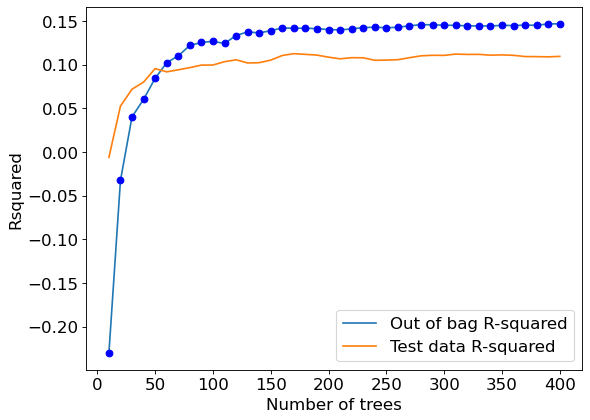

In [33]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(oob_rsquared.keys(),oob_rsquared.values(),label = 'Out of bag R-squared')
plt.plot(oob_rsquared.keys(),oob_rsquared.values(),'o',color = 'blue')
plt.plot(test_rsquared.keys(),test_rsquared.values(), label = 'Test data R-squared')
plt.xlabel('Number of trees')
plt.ylabel('Rsquared')
plt.legend()

In [87]:
#Optimizing with OOB score takes half the time as compared to cross validation. 
#The number of models developed with OOB score tuning is one-fifth of the number of models developed with
#5-fold cross validation
start_time = time.time()

n_samples = X_train.shape[0]
n_features = X_train.shape[1]

params = {'n_estimators': [100,200,300],
          'max_depth': [12,15,18],
          'max_leaf_nodes':[300,500,700],
          'max_features': [2,3,4]}

param_list=list(it.product(*(params[Name] for Name in params)))

oob_score = [0]*len(param_list)
i=0
for pr in param_list:
    model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                 max_depth=pr[1],
                                  max_leaf_nodes=pr[2],max_features=pr[3],
                                  n_jobs=-1).fit(X_train,y_train)
    oob_score[i] = model.oob_score_
    i=i+1
    
end_time = time.time()
print("time taken = ", (end_time-start_time)/60, " minutes")
print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score (R-squared) = ", np.max(oob_score))

time taken =  0.7866912523905436  minutes
Best params =  (300, 18, 500, 4)
Best score (R-squared) =  0.23398546269748322


In [316]:
rf_best_params = param_list[np.argmax(oob_score)]

rf = RandomForestRegressor(n_estimators = rf_best_params[0],
                           max_depth = rf_best_params[1],
                           max_leaf_nodes = rf_best_params[2],
                           max_features = rf_best_params[3],
                           random_state=1,
                           n_jobs=-1).fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [89]:
feature_importances = rf.feature_importances_

rf_features = pd.DataFrame({'columns': X_train.columns,
                            'feature_importances': feature_importances})

#Top 30 feature importances
rf_features.sort_values(by='feature_importances', ascending=False).head(30)


,columns,feature_importances
9,x014,0.025876
53,x096,0.024684
57,x105,0.019328
35,x062,0.015996
40,x074,0.015632
77,x165,0.015405
104,x274,0.014651
59,x111,0.013418
45,x080,0.012869
126,x347,0.011812


In [90]:
print("Random Forest model RMSE = ", np.sqrt(mean_squared_error(rf.predict(X_test),y_test)))

Random Forest model RMSE =  10.29375916141382


ADA Boost

>100 14.851 (0.964)


Text(0.5, 0, 'Number of trees')

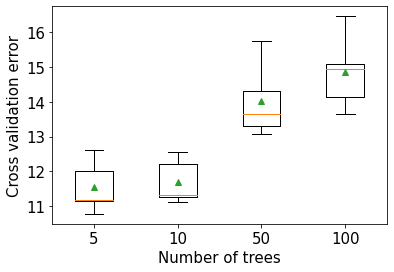

In [71]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [5, 10, 50, 100]
    for n in n_trees:
        models[str(n)] = AdaBoostRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y,scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    
print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)


>1 12.632 (0.453)
>2 12.903 (1.251)
>3 14.148 (0.774)
>4 12.557 (0.734)
>5 11.366 (0.690)


Text(0.5, 0, 'Depth of each tree')

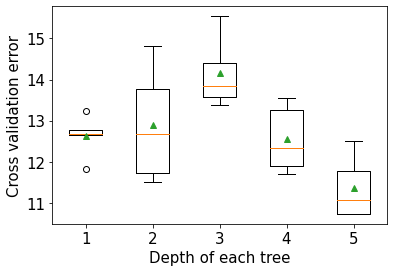

In [73]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 1 to 5
    for i in range(1,6):
        # define base model
        base = DecisionTreeRegressor(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>9 10.614 (0.870)
>10 10.675 (0.876)
>11 10.753 (0.726)
>12 10.637 (0.817)


Text(0.5, 0, 'Depth of each tree')

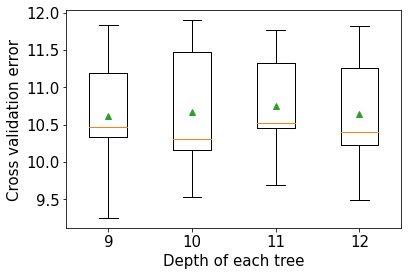

In [75]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore depths from 6 to 8
    for i in range(9,13):
        # define base model
        base = DecisionTreeRegressor(max_depth=i)
        # define ensemble model
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    # evaluate the model and collect the results
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

In [77]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = [5, 10, 50]
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['base_estimator'] = [DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=6), 
                          DecisionTreeRegressor(max_depth=10)]
# define the evaluation procedure
cv = KFold(n_splits=5, shuffle=True, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: -115.479693 using {'base_estimator': DecisionTreeRegressor(max_depth=6), 'learning_rate': 0.1, 'n_estimators': 50}


In [80]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), learning_rate = 0.1, 
                          n_estimators=50,random_state=1).fit(X_train, y_train)

In [83]:
print("AdaBoost model RMSE = ", np.sqrt(mean_squared_error(ada.predict(X_test),y_test)))

AdaBoost model RMSE =  10.392352404175933


In [82]:
feature_importances = ada.feature_importances_

ada_features = pd.DataFrame({'columns': X_train.columns,
                            'feature_importances': feature_importances})

#Top 30 feature importances
ada_features.sort_values(by='feature_importances', ascending=False).head(30)


,columns,feature_importances
9,x014,0.203200
57,x105,0.059790
124,x337,0.058577
53,x096,0.052799
104,x274,0.024392
31,x051,0.018098
8,x013,0.018076
12,x017,0.017277
3,x004,0.016575
34,x061,0.016540


Ensemble

In [309]:
ensemble_model = VotingRegressor(estimators=[('ada',ada),('rf',rf)])
ensemble_model.fit(X_train,y_train)
print("Ensemble model RMSE = ", np.sqrt(mean_squared_error(ensemble_model.predict(X_test),y_test)))

Ensemble model RMSE =  9.992739843239333


Fit to entire training data

In [368]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_id = test.id

train = train.drop(columns = 'id')
test = test.drop(columns = 'id')

In [344]:
corr_matrix = train.corr()
corr_matrix

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
x001,1.000000,-0.102542,0.153749,0.379679,0.493197,0.247154,-0.165646,-0.103770,-0.032586,-0.108841,...,-0.052222,-0.006532,-0.016382,-0.057818,0.602138,-0.058439,0.629004,-0.149572,-0.005274,0.002661
x002,-0.102542,1.000000,-0.177286,0.035330,-0.180123,0.071401,0.463602,0.961286,0.103345,0.257011,...,0.058053,0.104158,0.045745,0.102208,-0.007468,0.101158,0.017972,0.819495,-0.022161,-0.065831
x003,0.153749,-0.177286,1.000000,-0.066532,-0.052850,-0.113437,-0.500092,-0.197902,-0.179138,-0.323675,...,-0.252394,-0.137534,-0.091690,-0.234049,0.159373,-0.236631,0.204255,-0.500867,-0.005638,0.201294
x004,0.379679,0.035330,-0.066532,1.000000,0.231413,0.222151,0.126973,0.075906,0.038667,0.097453,...,0.082101,0.021076,0.011411,0.044423,0.186038,0.046296,0.225874,0.086455,0.005585,-0.021558
x005,0.493197,-0.180123,-0.052850,0.231413,1.000000,0.166817,-0.061912,-0.115242,0.069205,-0.077010,...,0.050146,0.131325,0.046695,0.040076,-0.007635,0.042812,-0.128443,-0.025749,0.060317,-0.060656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x762,-0.058439,0.101158,-0.236631,0.046296,0.042812,0.098511,0.366232,0.150967,0.942280,0.300473,...,0.842035,0.227901,0.042165,0.999511,-0.082885,1.000000,-0.101544,0.272372,-0.006575,-0.063036
x763,0.629004,0.017972,0.204255,0.225874,-0.128443,0.226026,-0.154933,-0.019153,-0.085807,-0.086384,...,-0.100417,-0.086515,-0.037527,-0.099358,0.794701,-0.101544,1.000000,-0.141807,-0.032923,0.009145
x764,-0.149572,0.819495,-0.500867,0.086455,-0.025749,0.116250,0.741603,0.853014,0.244453,0.478806,...,0.250796,0.210006,0.094214,0.269973,-0.133994,0.272372,-0.141807,1.000000,-0.016775,-0.128958
x765,-0.005274,-0.022161,-0.005638,0.005585,0.060317,-0.014770,-0.011229,-0.012326,-0.003104,-0.015868,...,-0.002085,-0.001432,-0.032845,-0.006884,-0.017833,-0.006575,-0.032923,-0.016775,1.000000,0.067693


In [345]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

len(to_drop)

<ipython-input-345-c52ce255f6c5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


532

In [369]:
# Drop the highly correlated features
train = train.drop(train[to_drop], axis=1)

X = train.drop(columns = 'y')
y = train['y']

# Standardize training data
sc = StandardScaler()

sc.fit(X)
X_train = sc.transform(X)

X_train = pd.DataFrame(X_train, columns= X.columns)

# Match X_test columns to X_train
X_test = test.loc[:, X_train.columns]
X_test = sc.transform(X_test)

# Convert test numpy array to pd df
X_test = pd.DataFrame(X_test, columns= X.columns)

# Change X_train name to X
X = X_train

In [370]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test),columns = X_test.columns)

In [371]:
pca = PCA(n_components=0.95, svd_solver = "full")
pca.fit(X)
print(pca.n_components_)

131


In [372]:
# transform the pandas dataframe into an array
X_transformed = pca.transform(X)

# transform the array back into a pandas dataframe
X_inverse_transformed = pd.DataFrame(pca.inverse_transform(X_transformed)[:, :pca.n_components_],
                                     columns=X.columns[:pca.n_components_])

X = X_inverse_transformed
X_test = X_test.loc[:, X.columns]

In [365]:
X = X.loc[:, ['x014', 'x105', 'x274', 'x096', 'x337', 'x013', 'x027', 'x006', 'x275', 'x035', 'x163', 'x062', 'x074', 'x135', 'x165', 'x017', 'x003']]
X_test = X_test.loc[:, X.columns]

In [366]:
cat = CatBoostRegressor(loss_function='RMSE', random_seed=42).fit(X,y)

Learning rate set to 0.053413
0:	learn: 11.8812669	total: 15.2ms	remaining: 15.2s
1:	learn: 11.7504366	total: 26.3ms	remaining: 13.1s
2:	learn: 11.6244569	total: 38.7ms	remaining: 12.9s
3:	learn: 11.4987693	total: 49.1ms	remaining: 12.2s
4:	learn: 11.3856121	total: 57.5ms	remaining: 11.4s
5:	learn: 11.2801011	total: 66.3ms	remaining: 11s
6:	learn: 11.1827163	total: 75.3ms	remaining: 10.7s
7:	learn: 11.0897082	total: 83.9ms	remaining: 10.4s
8:	learn: 10.9982227	total: 91.2ms	remaining: 10s
9:	learn: 10.9080949	total: 99.3ms	remaining: 9.83s
10:	learn: 10.8156836	total: 107ms	remaining: 9.66s
11:	learn: 10.7490735	total: 117ms	remaining: 9.61s
12:	learn: 10.6785025	total: 126ms	remaining: 9.56s
13:	learn: 10.6012867	total: 134ms	remaining: 9.42s
14:	learn: 10.5391331	total: 142ms	remaining: 9.34s
15:	learn: 10.4679727	total: 150ms	remaining: 9.24s
16:	learn: 10.4179305	total: 160ms	remaining: 9.23s
17:	learn: 10.3578939	total: 168ms	remaining: 9.18s
18:	learn: 10.2989566	total: 177ms	rem

176:	learn: 8.0208323	total: 1.47s	remaining: 6.83s
177:	learn: 8.0135955	total: 1.48s	remaining: 6.82s
178:	learn: 8.0062637	total: 1.48s	remaining: 6.8s
179:	learn: 7.9960814	total: 1.49s	remaining: 6.79s
180:	learn: 7.9883666	total: 1.5s	remaining: 6.78s
181:	learn: 7.9839873	total: 1.5s	remaining: 6.76s
182:	learn: 7.9787648	total: 1.51s	remaining: 6.75s
183:	learn: 7.9747817	total: 1.52s	remaining: 6.74s
184:	learn: 7.9673756	total: 1.53s	remaining: 6.73s
185:	learn: 7.9632179	total: 1.54s	remaining: 6.72s
186:	learn: 7.9561868	total: 1.54s	remaining: 6.71s
187:	learn: 7.9505292	total: 1.55s	remaining: 6.7s
188:	learn: 7.9430931	total: 1.56s	remaining: 6.69s
189:	learn: 7.9404701	total: 1.57s	remaining: 6.68s
190:	learn: 7.9314219	total: 1.57s	remaining: 6.67s
191:	learn: 7.9270973	total: 1.58s	remaining: 6.67s
192:	learn: 7.9188454	total: 1.59s	remaining: 6.66s
193:	learn: 7.9114752	total: 1.6s	remaining: 6.65s
194:	learn: 7.9047903	total: 1.61s	remaining: 6.64s
195:	learn: 7.891

340:	learn: 7.0415724	total: 2.75s	remaining: 5.32s
341:	learn: 7.0367075	total: 2.76s	remaining: 5.31s
342:	learn: 7.0323252	total: 2.77s	remaining: 5.3s
343:	learn: 7.0249467	total: 2.77s	remaining: 5.29s
344:	learn: 7.0217482	total: 2.78s	remaining: 5.28s
345:	learn: 7.0187116	total: 2.79s	remaining: 5.27s
346:	learn: 7.0115721	total: 2.8s	remaining: 5.27s
347:	learn: 7.0060221	total: 2.81s	remaining: 5.26s
348:	learn: 7.0037697	total: 2.81s	remaining: 5.25s
349:	learn: 7.0008974	total: 2.82s	remaining: 5.24s
350:	learn: 6.9977349	total: 2.83s	remaining: 5.23s
351:	learn: 6.9937666	total: 2.84s	remaining: 5.22s
352:	learn: 6.9878435	total: 2.85s	remaining: 5.21s
353:	learn: 6.9820264	total: 2.85s	remaining: 5.21s
354:	learn: 6.9782037	total: 2.86s	remaining: 5.2s
355:	learn: 6.9760180	total: 2.87s	remaining: 5.19s
356:	learn: 6.9725964	total: 2.88s	remaining: 5.18s
357:	learn: 6.9679794	total: 2.88s	remaining: 5.17s
358:	learn: 6.9646451	total: 2.89s	remaining: 5.16s
359:	learn: 6.9

523:	learn: 6.2430504	total: 4.17s	remaining: 3.79s
524:	learn: 6.2385049	total: 4.18s	remaining: 3.78s
525:	learn: 6.2339430	total: 4.19s	remaining: 3.77s
526:	learn: 6.2300832	total: 4.19s	remaining: 3.76s
527:	learn: 6.2228559	total: 4.2s	remaining: 3.75s
528:	learn: 6.2192085	total: 4.21s	remaining: 3.75s
529:	learn: 6.2157894	total: 4.21s	remaining: 3.74s
530:	learn: 6.2079991	total: 4.22s	remaining: 3.73s
531:	learn: 6.2054135	total: 4.23s	remaining: 3.72s
532:	learn: 6.2027531	total: 4.24s	remaining: 3.71s
533:	learn: 6.2018667	total: 4.24s	remaining: 3.7s
534:	learn: 6.1982092	total: 4.25s	remaining: 3.69s
535:	learn: 6.1963925	total: 4.26s	remaining: 3.69s
536:	learn: 6.1936718	total: 4.26s	remaining: 3.68s
537:	learn: 6.1897562	total: 4.27s	remaining: 3.67s
538:	learn: 6.1845897	total: 4.28s	remaining: 3.66s
539:	learn: 6.1811973	total: 4.28s	remaining: 3.65s
540:	learn: 6.1781496	total: 4.29s	remaining: 3.64s
541:	learn: 6.1743992	total: 4.3s	remaining: 3.63s
542:	learn: 6.1

686:	learn: 5.6907365	total: 5.46s	remaining: 2.49s
687:	learn: 5.6879509	total: 5.47s	remaining: 2.48s
688:	learn: 5.6868917	total: 5.48s	remaining: 2.47s
689:	learn: 5.6825437	total: 5.49s	remaining: 2.46s
690:	learn: 5.6815103	total: 5.49s	remaining: 2.46s
691:	learn: 5.6794888	total: 5.5s	remaining: 2.45s
692:	learn: 5.6730145	total: 5.51s	remaining: 2.44s
693:	learn: 5.6687769	total: 5.52s	remaining: 2.43s
694:	learn: 5.6666121	total: 5.53s	remaining: 2.42s
695:	learn: 5.6643785	total: 5.53s	remaining: 2.42s
696:	learn: 5.6602362	total: 5.54s	remaining: 2.41s
697:	learn: 5.6575642	total: 5.55s	remaining: 2.4s
698:	learn: 5.6548490	total: 5.56s	remaining: 2.39s
699:	learn: 5.6540932	total: 5.57s	remaining: 2.39s
700:	learn: 5.6510539	total: 5.58s	remaining: 2.38s
701:	learn: 5.6505096	total: 5.58s	remaining: 2.37s
702:	learn: 5.6490914	total: 5.59s	remaining: 2.36s
703:	learn: 5.6458750	total: 5.6s	remaining: 2.35s
704:	learn: 5.6445508	total: 5.61s	remaining: 2.35s
705:	learn: 5.6

846:	learn: 5.2202287	total: 6.78s	remaining: 1.23s
847:	learn: 5.2171380	total: 6.79s	remaining: 1.22s
848:	learn: 5.2124488	total: 6.8s	remaining: 1.21s
849:	learn: 5.2100955	total: 6.81s	remaining: 1.2s
850:	learn: 5.2064450	total: 6.82s	remaining: 1.19s
851:	learn: 5.2035012	total: 6.82s	remaining: 1.19s
852:	learn: 5.2004205	total: 6.83s	remaining: 1.18s
853:	learn: 5.1976108	total: 6.84s	remaining: 1.17s
854:	learn: 5.1931511	total: 6.85s	remaining: 1.16s
855:	learn: 5.1880066	total: 6.86s	remaining: 1.15s
856:	learn: 5.1853758	total: 6.86s	remaining: 1.15s
857:	learn: 5.1825002	total: 6.87s	remaining: 1.14s
858:	learn: 5.1818142	total: 6.88s	remaining: 1.13s
859:	learn: 5.1805474	total: 6.89s	remaining: 1.12s
860:	learn: 5.1774116	total: 6.9s	remaining: 1.11s
861:	learn: 5.1749803	total: 6.91s	remaining: 1.1s
862:	learn: 5.1727447	total: 6.91s	remaining: 1.1s
863:	learn: 5.1693903	total: 6.92s	remaining: 1.09s
864:	learn: 5.1656254	total: 6.93s	remaining: 1.08s
865:	learn: 5.161

In [335]:
rf_best_params = param_list[np.argmax(oob_score)]

rf = RandomForestRegressor(n_estimators = rf_best_params[0],
                           max_depth = rf_best_params[1],
                           max_leaf_nodes = rf_best_params[2],
                           max_features = rf_best_params[3],
                           random_state=1,
                           n_jobs=-1).fit(X, y)

In [336]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6), learning_rate = 0.1, 
                          n_estimators=50,random_state=1).fit(X, y)

In [361]:
ensemble_model = VotingRegressor(estimators=[('ada',ada),('rf',rf),('cat',cat)])
ensemble_model.fit(X,y)

Learning rate set to 0.053413
0:	learn: 11.8694004	total: 46.9ms	remaining: 46.8s
1:	learn: 11.7538402	total: 85.1ms	remaining: 42.5s
2:	learn: 11.6312132	total: 124ms	remaining: 41.4s
3:	learn: 11.5151022	total: 165ms	remaining: 41.1s
4:	learn: 11.3992196	total: 202ms	remaining: 40.2s
5:	learn: 11.3037057	total: 235ms	remaining: 38.9s
6:	learn: 11.1940109	total: 271ms	remaining: 38.5s
7:	learn: 11.1054338	total: 310ms	remaining: 38.4s
8:	learn: 11.0160734	total: 349ms	remaining: 38.5s
9:	learn: 10.9356269	total: 387ms	remaining: 38.3s
10:	learn: 10.8673828	total: 424ms	remaining: 38.2s
11:	learn: 10.7822476	total: 465ms	remaining: 38.3s
12:	learn: 10.7278909	total: 507ms	remaining: 38.5s
13:	learn: 10.6636839	total: 545ms	remaining: 38.4s
14:	learn: 10.6117598	total: 585ms	remaining: 38.4s
15:	learn: 10.5427154	total: 626ms	remaining: 38.5s
16:	learn: 10.4885544	total: 662ms	remaining: 38.3s
17:	learn: 10.4242989	total: 698ms	remaining: 38.1s
18:	learn: 10.3589672	total: 739ms	remaini

164:	learn: 7.6841047	total: 6.48s	remaining: 32.8s
165:	learn: 7.6738019	total: 6.53s	remaining: 32.8s
166:	learn: 7.6649067	total: 6.57s	remaining: 32.8s
167:	learn: 7.6526345	total: 6.61s	remaining: 32.7s
168:	learn: 7.6415650	total: 6.65s	remaining: 32.7s
169:	learn: 7.6329788	total: 6.7s	remaining: 32.7s
170:	learn: 7.6247714	total: 6.73s	remaining: 32.6s
171:	learn: 7.6146746	total: 6.77s	remaining: 32.6s
172:	learn: 7.6045616	total: 6.81s	remaining: 32.6s
173:	learn: 7.5964640	total: 6.85s	remaining: 32.5s
174:	learn: 7.5858994	total: 6.9s	remaining: 32.5s
175:	learn: 7.5726720	total: 6.93s	remaining: 32.5s
176:	learn: 7.5671960	total: 6.97s	remaining: 32.4s
177:	learn: 7.5519483	total: 7.01s	remaining: 32.4s
178:	learn: 7.5302386	total: 7.05s	remaining: 32.4s
179:	learn: 7.5188138	total: 7.09s	remaining: 32.3s
180:	learn: 7.5102852	total: 7.14s	remaining: 32.3s
181:	learn: 7.5013054	total: 7.18s	remaining: 32.3s
182:	learn: 7.4904717	total: 7.22s	remaining: 32.2s
183:	learn: 7.

327:	learn: 6.2426998	total: 12.9s	remaining: 26.5s
328:	learn: 6.2371011	total: 13s	remaining: 26.5s
329:	learn: 6.2299788	total: 13s	remaining: 26.4s
330:	learn: 6.2241106	total: 13.1s	remaining: 26.4s
331:	learn: 6.2165021	total: 13.1s	remaining: 26.4s
332:	learn: 6.2094416	total: 13.1s	remaining: 26.3s
333:	learn: 6.2030097	total: 13.2s	remaining: 26.3s
334:	learn: 6.1924559	total: 13.2s	remaining: 26.3s
335:	learn: 6.1863438	total: 13.3s	remaining: 26.2s
336:	learn: 6.1800663	total: 13.3s	remaining: 26.2s
337:	learn: 6.1710920	total: 13.4s	remaining: 26.2s
338:	learn: 6.1600987	total: 13.4s	remaining: 26.1s
339:	learn: 6.1526245	total: 13.4s	remaining: 26.1s
340:	learn: 6.1472116	total: 13.5s	remaining: 26s
341:	learn: 6.1386176	total: 13.5s	remaining: 26s
342:	learn: 6.1313584	total: 13.6s	remaining: 26s
343:	learn: 6.1256008	total: 13.6s	remaining: 25.9s
344:	learn: 6.1176555	total: 13.6s	remaining: 25.9s
345:	learn: 6.1133165	total: 13.7s	remaining: 25.8s
346:	learn: 6.1055475	

487:	learn: 5.2781460	total: 19.3s	remaining: 20.2s
488:	learn: 5.2720939	total: 19.3s	remaining: 20.2s
489:	learn: 5.2668041	total: 19.3s	remaining: 20.1s
490:	learn: 5.2639425	total: 19.4s	remaining: 20.1s
491:	learn: 5.2589699	total: 19.4s	remaining: 20s
492:	learn: 5.2516754	total: 19.5s	remaining: 20s
493:	learn: 5.2472539	total: 19.5s	remaining: 20s
494:	learn: 5.2428609	total: 19.5s	remaining: 19.9s
495:	learn: 5.2368998	total: 19.6s	remaining: 19.9s
496:	learn: 5.2321729	total: 19.6s	remaining: 19.8s
497:	learn: 5.2246681	total: 19.6s	remaining: 19.8s
498:	learn: 5.2194206	total: 19.7s	remaining: 19.8s
499:	learn: 5.2141043	total: 19.7s	remaining: 19.7s
500:	learn: 5.2071664	total: 19.8s	remaining: 19.7s
501:	learn: 5.2015736	total: 19.8s	remaining: 19.6s
502:	learn: 5.1992942	total: 19.8s	remaining: 19.6s
503:	learn: 5.1958256	total: 19.9s	remaining: 19.6s
504:	learn: 5.1920127	total: 19.9s	remaining: 19.5s
505:	learn: 5.1874401	total: 20s	remaining: 19.5s
506:	learn: 5.182338

647:	learn: 4.5384153	total: 25.7s	remaining: 13.9s
648:	learn: 4.5325333	total: 25.7s	remaining: 13.9s
649:	learn: 4.5283054	total: 25.7s	remaining: 13.9s
650:	learn: 4.5222646	total: 25.8s	remaining: 13.8s
651:	learn: 4.5167220	total: 25.8s	remaining: 13.8s
652:	learn: 4.5136755	total: 25.9s	remaining: 13.7s
653:	learn: 4.5112435	total: 25.9s	remaining: 13.7s
654:	learn: 4.5074216	total: 25.9s	remaining: 13.7s
655:	learn: 4.5008557	total: 26s	remaining: 13.6s
656:	learn: 4.4969884	total: 26s	remaining: 13.6s
657:	learn: 4.4936088	total: 26.1s	remaining: 13.5s
658:	learn: 4.4891314	total: 26.1s	remaining: 13.5s
659:	learn: 4.4857540	total: 26.1s	remaining: 13.5s
660:	learn: 4.4792312	total: 26.2s	remaining: 13.4s
661:	learn: 4.4761800	total: 26.2s	remaining: 13.4s
662:	learn: 4.4711339	total: 26.3s	remaining: 13.3s
663:	learn: 4.4681838	total: 26.3s	remaining: 13.3s
664:	learn: 4.4664103	total: 26.3s	remaining: 13.3s
665:	learn: 4.4620611	total: 26.4s	remaining: 13.2s
666:	learn: 4.45

807:	learn: 3.9365287	total: 32.1s	remaining: 7.63s
808:	learn: 3.9326010	total: 32.2s	remaining: 7.59s
809:	learn: 3.9273407	total: 32.2s	remaining: 7.55s
810:	learn: 3.9247348	total: 32.2s	remaining: 7.51s
811:	learn: 3.9184802	total: 32.3s	remaining: 7.47s
812:	learn: 3.9150075	total: 32.3s	remaining: 7.43s
813:	learn: 3.9121281	total: 32.3s	remaining: 7.39s
814:	learn: 3.9076474	total: 32.4s	remaining: 7.35s
815:	learn: 3.9040935	total: 32.4s	remaining: 7.31s
816:	learn: 3.9007364	total: 32.5s	remaining: 7.27s
817:	learn: 3.8978781	total: 32.5s	remaining: 7.23s
818:	learn: 3.8937336	total: 32.6s	remaining: 7.19s
819:	learn: 3.8900918	total: 32.6s	remaining: 7.15s
820:	learn: 3.8856485	total: 32.6s	remaining: 7.12s
821:	learn: 3.8804419	total: 32.7s	remaining: 7.08s
822:	learn: 3.8776091	total: 32.7s	remaining: 7.04s
823:	learn: 3.8749453	total: 32.8s	remaining: 7s
824:	learn: 3.8724008	total: 32.8s	remaining: 6.96s
825:	learn: 3.8703300	total: 32.8s	remaining: 6.92s
826:	learn: 3.8

971:	learn: 3.4114359	total: 38.6s	remaining: 1.11s
972:	learn: 3.4082076	total: 38.6s	remaining: 1.07s
973:	learn: 3.4058359	total: 38.6s	remaining: 1.03s
974:	learn: 3.4025649	total: 38.7s	remaining: 992ms
975:	learn: 3.4003537	total: 38.7s	remaining: 952ms
976:	learn: 3.3982146	total: 38.8s	remaining: 912ms
977:	learn: 3.3956213	total: 38.8s	remaining: 873ms
978:	learn: 3.3940444	total: 38.8s	remaining: 833ms
979:	learn: 3.3917243	total: 38.9s	remaining: 793ms
980:	learn: 3.3874389	total: 38.9s	remaining: 754ms
981:	learn: 3.3844123	total: 39s	remaining: 714ms
982:	learn: 3.3814426	total: 39s	remaining: 674ms
983:	learn: 3.3784575	total: 39s	remaining: 635ms
984:	learn: 3.3750531	total: 39.1s	remaining: 595ms
985:	learn: 3.3713058	total: 39.1s	remaining: 555ms
986:	learn: 3.3692000	total: 39.1s	remaining: 516ms
987:	learn: 3.3674320	total: 39.2s	remaining: 476ms
988:	learn: 3.3645120	total: 39.2s	remaining: 436ms
989:	learn: 3.3618677	total: 39.3s	remaining: 397ms
990:	learn: 3.3588

VotingRegressor(estimators=[('ada',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                                               learning_rate=0.1,
                                               random_state=1)),
                            ('rf',
                             RandomForestRegressor(max_depth=18, max_features=4,
                                                   max_leaf_nodes=500,
                                                   n_estimators=300, n_jobs=-1,
                                                   random_state=1)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x000001B439898E80>)])

In [362]:
#Predicted values
pred = ensemble_model.predict(X_test)
# pred = pred.flatten()
pred

array([ 6.76384815,  9.09754826,  5.78974589, ..., 10.23224297,
       11.98136632, 11.61960262])

In [363]:
test_id = pd.read_csv('test.csv')
test_id = test_id.loc[:,'id']

In [364]:
#Export to csv
predictions_regression = pd.DataFrame({"id" : test_id.values, "y": pred})
predictions_regression.to_csv("Predictions_Regression.csv",index = False)